In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data. Visadataset.csv file has 12 cols

path=r"C:\Users\User\OneDrive\Desktop\Omkar sir\DATA files\Visadataset.csv"

In [4]:
visa_df=pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Omkar sir\DATA files\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [7]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns

num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [10]:
# Import the packages
# Read the data
# Categorical to Numerical
# Find the outliers
## Import the packages, Read the data and divide data into numericala and categorical

# Import the packages
# Read the data




In [12]:
# outliers_data

wage_data=visa_df['prevailing_wage']

# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)

# Step-2:
IQR= q3-q1
# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR

#Step-4:
con1=wage_data<lb # T F
con2=wage_data>ub # T F
con3=con1|con2                                                  # Using bitwise 'OR' ie '|' operator to find outliers
# Bitwise operators used to compare
# Bits data === 0 and 1 == True false

#Step-3:
outliers_data=wage_data[con3]
outliers_data                                                  # output gives 427 prevailing _wages are out of range from IQR

# On calculationwe find that 427 is 1.67% of the total number of data ie 25480 

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [14]:
# non_outliers_data

wage_data=visa_df['prevailing_wage']

# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)

# Step-2:
IQR= q3-q1

# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR

#Step-4:
con1=wage_data>lb # T F
con2=wage_data<ub # T F
con3=con1&con2                                                      # Using bitwise AND operator & to find non-outliers
# Bitwise operators used to compare
# Bits data === 0 and 1 == True false

#Step-3:
#np.logical_and(Con1, Con2) 
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


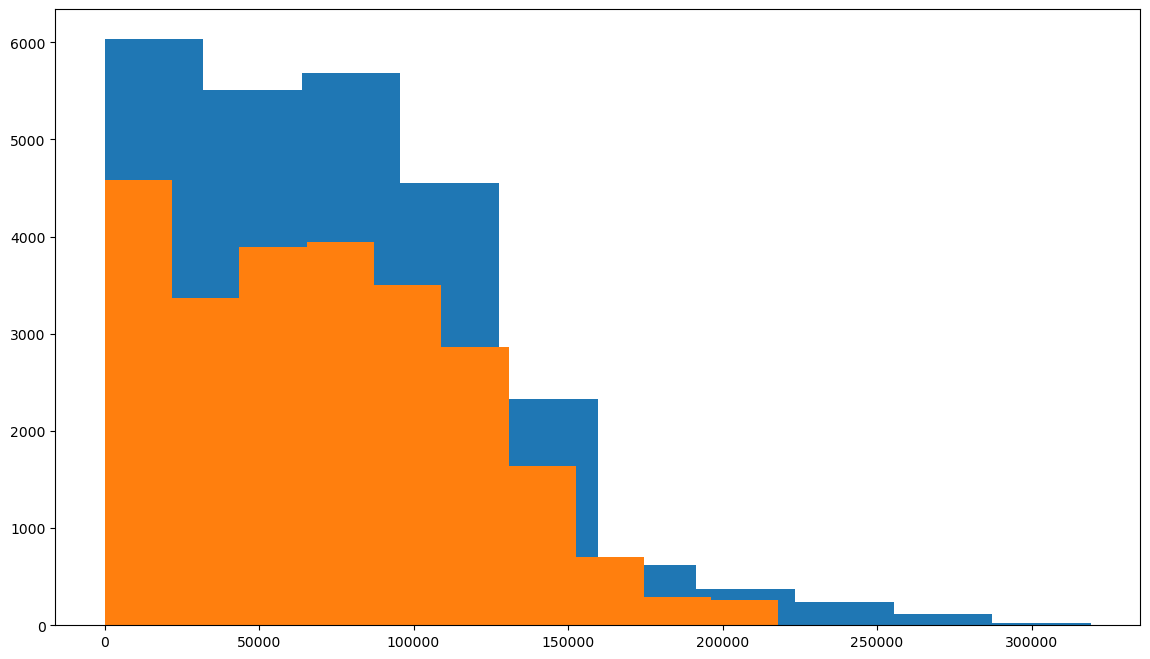

In [24]:
# superimposing Entire data and Non_outliers_data in a single histogram to compare the difference of the two

################### Entire data and Non_outliers_data #######################################

wage_data=visa_df['prevailing_wage']
wage_data_non_outliers=non_outliers_df['prevailing_wage']


################# Use hist() 2 times on both data to superimpose the data ###################################### 

plt.figure(figsize=(14,8))

plt.hist(wage_data)                                     #  Entire data
plt.hist(wage_data_non_outliers)                        #  Non_outliers_data

plt.show()

**How to deal outliers**

- 1. We can drop the outliers
 
     - Dropping outliers is an easy task, but not recomended
    
     - If you drop the outliers we are dropping the rows
    
     - which means we are dropping the other column values also
    
     - May be some important information we might loose from other column values
    
     - But in industry if outlier percentage less than 2% of the total data, we can drop
    
     - The number of outliers in pwage is 427
    
     - The number of total observations are 25480
    
     - The percentage is 1.67 which is less than 2%

- 2. Fill with Median value
 
     - We already know that outliers does not affect by median
    
     - so it is the best practice to fill the outliers with median
    
- 3. Capping or Flooring
 
     - Instead of fill with median

     - We can fill with certain values
    
     - the outliers which are less than LB fill with LB value
    
     - the outliers which are greater than UB fill with UB value
    
- **Isolation Forest**

  - Is ML model used to find the Outliers and anamolies 

**np.where()**       
# used as a shorcut ; similar to 'if-then-else'

- In numpy we have method called where()

- It takes three arguments

    - 1. Condition

    - 2. Value if Condition is True

    - 3. Value if Condition is False
     
- It is applicable for only Binary means if and else

In [ ]:
# Steps if we dont use np.where()...Use for loop + if else; Instead we use np.where () , its a shortcut:

# list1=[]
# for value in wage_data:
#     if value < LB or value > UB:
#          median=wage_data.median()
#          list1.append(median)
#     else:
#         list1.append(value)
        

In [30]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [33]:
# Qn: I want to replace marks with 1 , which are greater than 100
# In Dictionary:

dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

l=[]
for i in df['marks']:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [36]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [38]:
# np.where(<condition>,<True>,<False>)

con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [46]:
# Implement for the outliers median() method and np.where() method
# similar to if-then -else condition 

wage_data=visa_df['prevailing_wage']

con1= wage_data<lb

con2= wage_data>ub

con= con1 | con2

wage_med=wage_data.median()

list1=np.where(con,wage_med,wage_data)                 # if (con is true, execute true path , else execute false path)
list1

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [48]:
visa_df['prevailing_wage_update']=list1

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

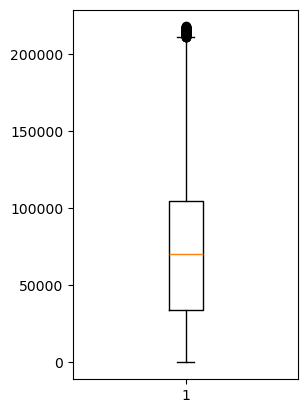

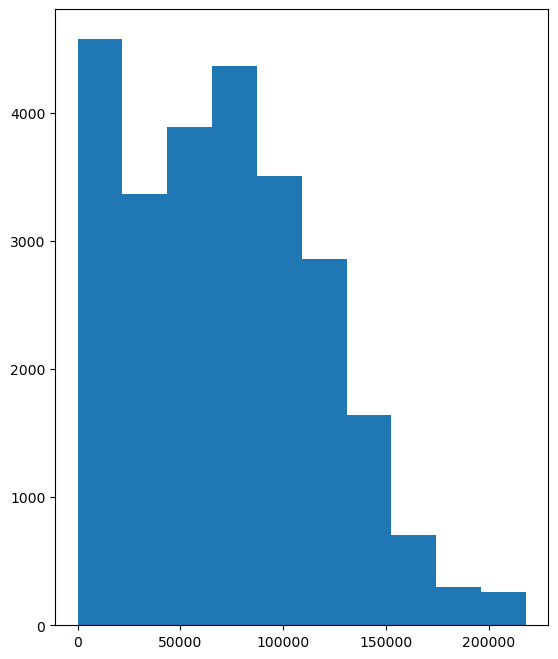

In [56]:
# boxplot and histogram for updated_prevailing_wage data

plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])

plt.figure(figsize=(14,8))
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])